### Setup

In [1]:
!pip install geopandas
!pip install mapclassify

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify

### Load Data

In [3]:
URL = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Community_Districts/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
cd = gpd.read_file(URL)

# Format CD
boro_dict = {'1':'MN','2':'BX','4':'BK','3':'QN','5':'SI'}

cd['boro_id'] = cd['BoroCD'].astype(str).str[0]
cd['boro_id'] = cd['boro_id'].replace(boro_dict)+cd['BoroCD'].astype(str).str[1:]

In [4]:
# load normalized data
data = pd.read_csv('final_merged_normalized_discretized.csv')
data = data[data.columns[1:]]

In [5]:
# agg data by CD, take the mean
# data_agg = data.groupby(by='CD').agg({'REFUSETONSCOLLECTED_pp':'mean','business_sqmi':'mean','unitstotal':'mean','dirty_level':'mean'})
data_agg = data.groupby(by='CD').mean()
data_agg = data_agg.reset_index()

In [6]:
# merge CD gdf with data
cd_merge = cd.merge(data_agg, left_on='boro_id', right_on='CD')
cd_merge.head()

,OBJECTID,BoroCD,Shape__Area,Shape__Length,geometry,boro_id,CD,Year,Month,dirty_level,...,paper_baskets_sqmi,mgp_baskets_sqmi,seasonal_wire_litter_basket_sqmi,highend_basket_sqmi,publicspacereceptacle_sqmi,wire_basket_sqmi,total_litter_baskets_sqmi,fs_open_sqmi,restaurant_sqmi,business_sqmi
0,1,206,4.266431e+07,35875.711733,"POLYGON ((-73.87185 40.84377, -73.87192 40.843...",BX06,BX06,2018.830508,6.491525,1.728814,...,30.710907,30.710907,0.0,0.000000,7.841083,2.613694,10.454777,2.226070,92.786144,250.394120
1,2,404,6.573966e+07,37018.373839,"POLYGON ((-73.84751 40.73902, -73.84801 40.738...",BK04,BK04,2018.830508,6.491525,2.508475,...,0.000000,0.000000,0.0,0.492002,2.460008,2.460008,5.412019,2.251533,145.632501,244.558197
2,3,304,5.666255e+07,37007.766906,"POLYGON ((-73.89647 40.68234, -73.89653 40.682...",QN04,QN04,2018.830508,6.491525,1.118644,...,13.146051,13.146051,0.0,1.696265,0.848132,1.272199,3.816596,0.848132,365.969104,284.318398
3,4,205,3.831698e+07,29443.048129,"POLYGON ((-73.89138 40.86171, -73.89142 40.861...",BX05,BX05,2018.830508,6.491525,1.271186,...,0.000000,0.000000,0.0,0.000000,3.637796,0.727559,5.820473,0.000000,188.437820,379.354274
4,5,207,5.331180e+07,44812.008517,"POLYGON ((-73.87519 40.87158, -73.87619 40.870...",BX07,BX07,2018.830508,6.491525,1.355932,...,0.000000,0.000000,0.0,5.229212,1.045842,3.137527,9.412581,2.393029,124.978161,231.352737


### Combined

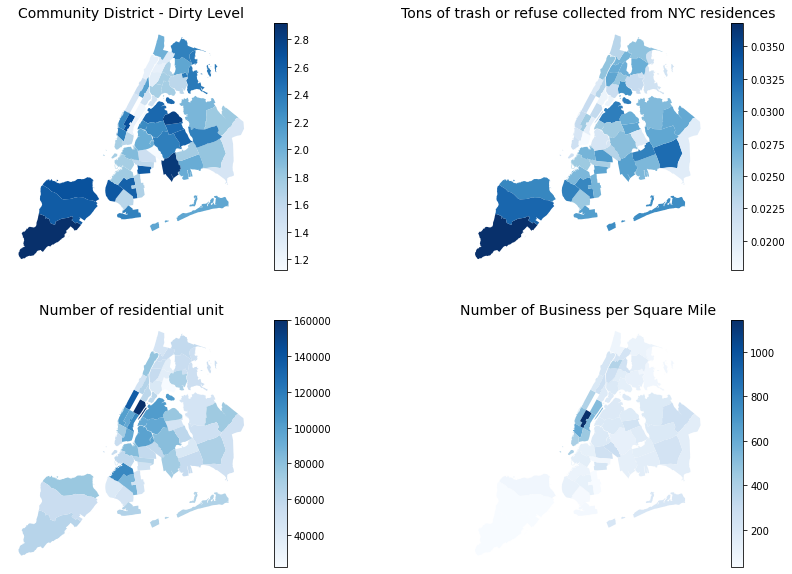

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

cd_merge.plot(column='dirty_level',categorical=False,cmap='Blues',legend=True, \
               ax=axs[0,0] )
axs[0,0].set_title('Community District - Dirty Level',fontsize=14)

cd_merge.plot(column='REFUSETONSCOLLECTED_pp',categorical=False,cmap='Blues',legend=True, \
              ax=axs[0,1])
axs[0,1].set_title('Tons of trash or refuse collected from NYC residences',fontsize=14)

cd_merge.plot(column='unitstotal',categorical=False,cmap='Blues',legend=True, \
              ax=axs[1,0] )
axs[1,0].set_title('Number of residential unit',fontsize=14)

cd_merge.plot(column='business_sqmi',categorical=False,cmap='Blues',legend=True, \
              ax=axs[1,1])
axs[1,1].set_title('Number of Business per Square Mile',fontsize=14)

for ax in axs.flat:
  ax.axis('off')

# plt.tight_layout()
plt.savefig('cd_combined.png',dpi=300)
plt.show()

### Combined, using Quantiles

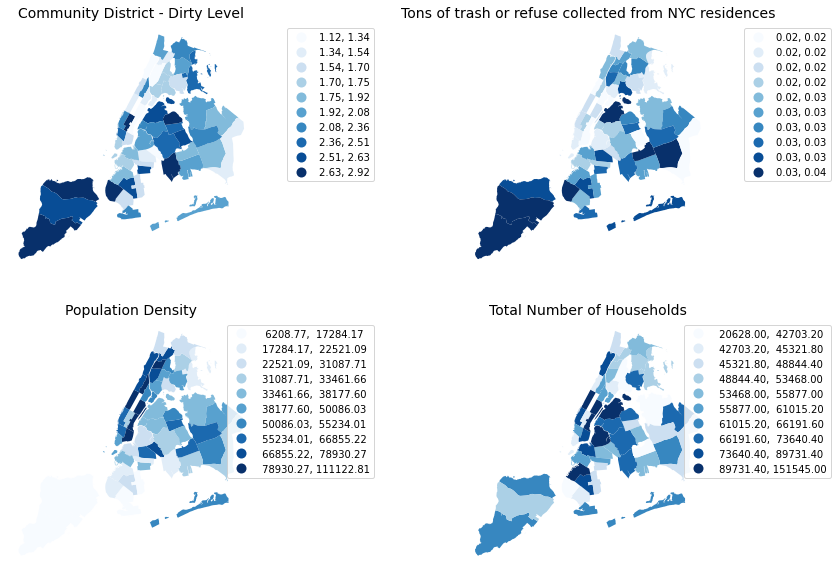

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

cd_merge.plot(column='dirty_level',categorical=False,cmap='Blues',legend=True, \
              legend_kwds={'bbox_to_anchor': (1.5, 1)}, scheme='Quantiles', k=10, ax=axs[0,0] )
axs[0,0].set_title('Community District - Dirty Level',fontsize=14)

cd_merge.plot(column='REFUSETONSCOLLECTED_pp',categorical=False,cmap='Blues',legend=True, \
              legend_kwds={'bbox_to_anchor': (1.5, 1)}, scheme='Quantiles', k=10, ax=axs[0,1])
axs[0,1].set_title('Tons of trash or refuse collected from NYC residences',fontsize=14)

cd_merge.plot(column='pop_density',categorical=False,cmap='Blues',legend=True, \
              legend_kwds={'bbox_to_anchor': (1.5, 1)}, scheme='Quantiles', k=10, ax=axs[1,0] )
axs[1,0].set_title('Population Density',fontsize=14)

cd_merge.plot(column='total_number_of_households',categorical=False,cmap='Blues',legend=True, \
              legend_kwds={'bbox_to_anchor': (1.5, 1)}, scheme='Quantiles', k=10, ax=axs[1,1])
axs[1,1].set_title('Total Number of Households',fontsize=14)

for ax in axs.flat:
  ax.axis('off')

# plt.tight_layout()
plt.savefig('cd_combined_quantiles.png',dpi=300)
plt.show()

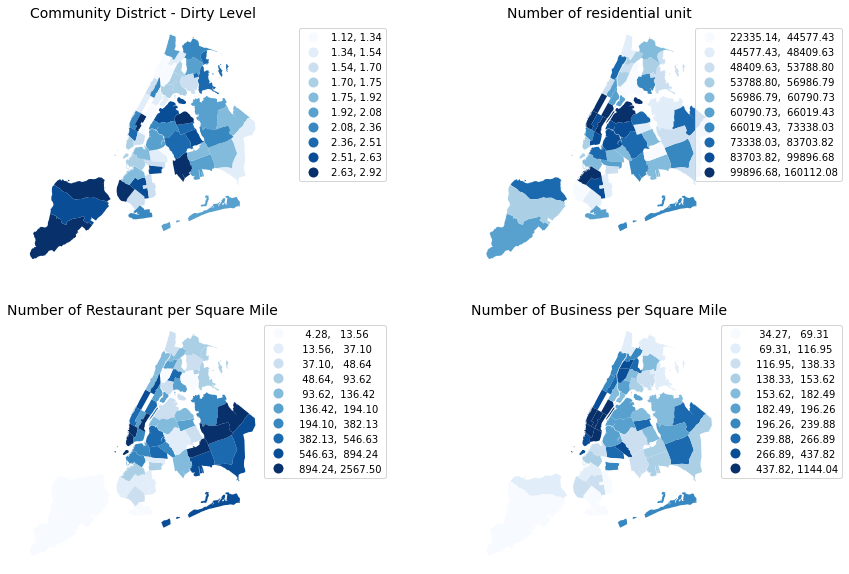

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))

cd_merge.plot(column='dirty_level',categorical=False,cmap='Blues',legend=True, \
              legend_kwds={'bbox_to_anchor': (1.5, 1)}, scheme='Quantiles', k=10, ax=axs[0,0] )
axs[0,0].set_title('Community District - Dirty Level',fontsize=14)

cd_merge.plot(column='unitstotal',categorical=False,cmap='Blues',legend=True, \
              legend_kwds={'bbox_to_anchor': (1.5, 1)}, scheme='Quantiles', k=10, ax=axs[0,1])
axs[0,1].set_title('Number of residential unit',fontsize=14)

cd_merge.plot(column='restaurant_sqmi',categorical=False,cmap='Blues',legend=True, \
              legend_kwds={'bbox_to_anchor': (1.5, 1)}, scheme='Quantiles', k=10, ax=axs[1,0] )
axs[1,0].set_title('Number of Restaurant per Square Mile',fontsize=14)

cd_merge.plot(column='business_sqmi',categorical=False,cmap='Blues',legend=True, \
              legend_kwds={'bbox_to_anchor': (1.5, 1)}, scheme='Quantiles', k=10, ax=axs[1,1])
axs[1,1].set_title('Number of Business per Square Mile',fontsize=14)

for ax in axs.flat:
  ax.axis('off')

# plt.tight_layout()
plt.savefig('cd_combined_quantiles_lu.png',dpi=300)
plt.show()

### Single feature map

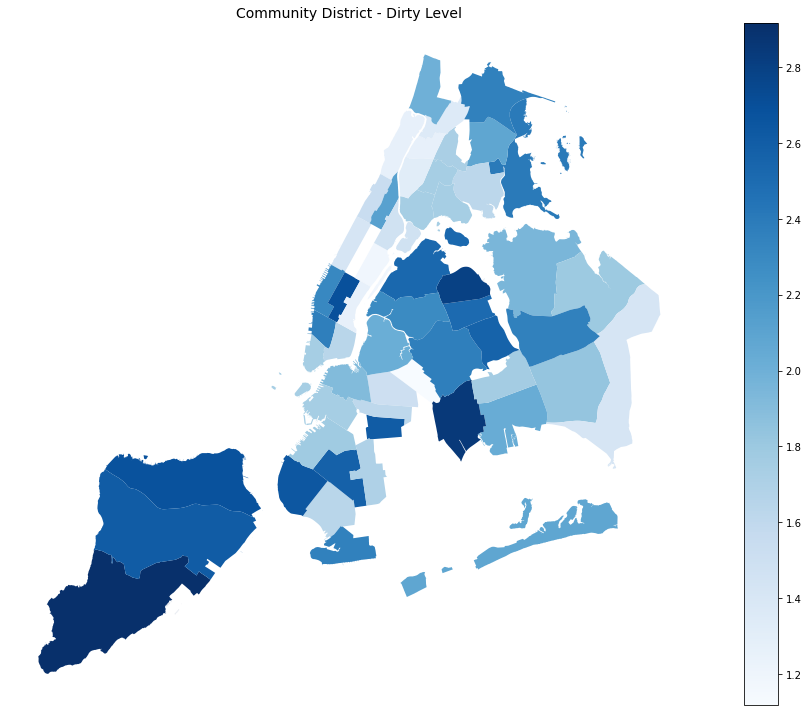

In [10]:
#Dirty Level
fig, ax = plt.subplots(1, figsize=(15,10))
cd_merge.plot(column='dirty_level',categorical=False,cmap='Blues',legend=True, label="Dirty Level", ax=ax, )
ax.axis('off')
ax.set_title('Community District - Dirty Level',fontsize=14)
plt.tight_layout()
plt.savefig('cd_dirty_level.png',dpi=300)
plt.show()

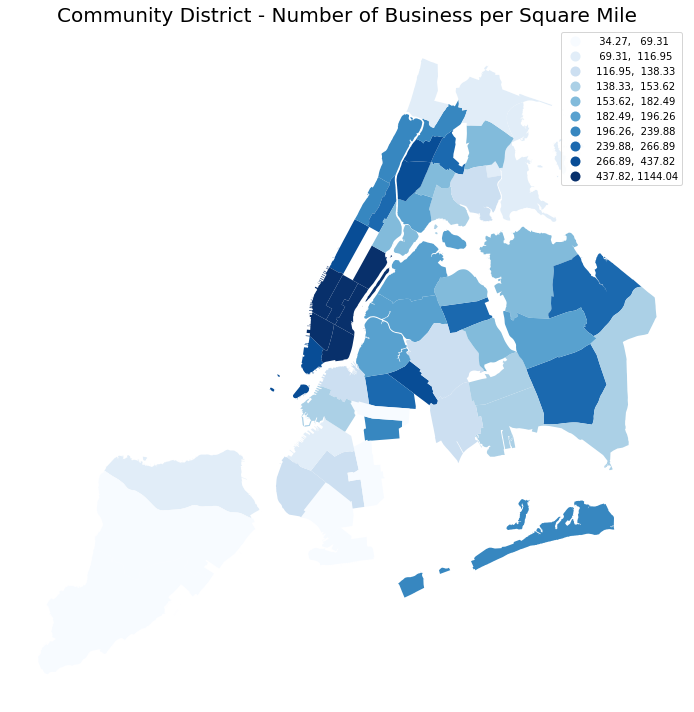

In [11]:
#Number of Business per square mile
fig, ax = plt.subplots(1, figsize=(15,10))
cd_merge.plot(column='business_sqmi',categorical=False,cmap='Blues',legend=True, scheme='Quantiles', k=10, label="Dirty Level", ax=ax, )
ax.axis('off')
ax.set_title('Community District - Number of Business per Square Mile',fontsize=20)
plt.tight_layout()
plt.savefig('cd_business_sqmi.png',dpi=300)
plt.show()

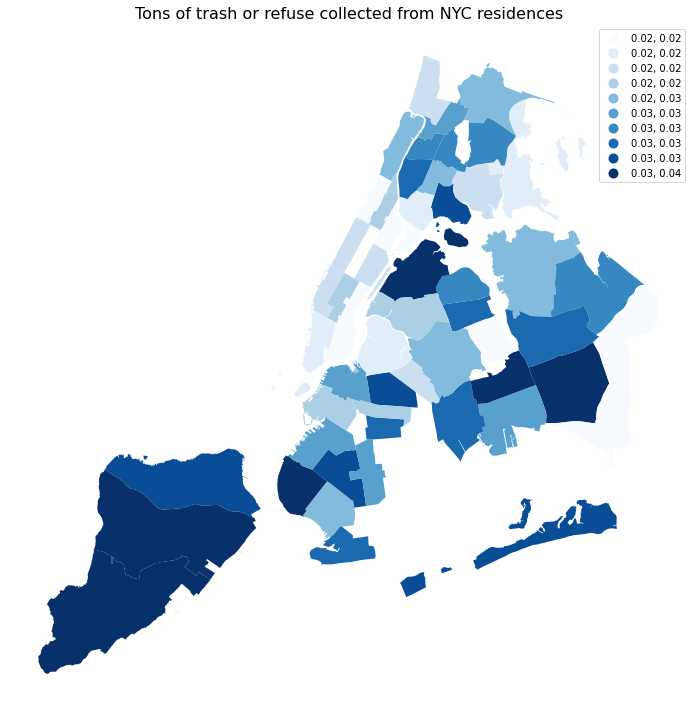

In [12]:
# Collected Trash from NYC residences
fig, ax = plt.subplots(1, figsize=(15,10))
cd_merge.plot(column='REFUSETONSCOLLECTED_pp',categorical=False,cmap='Blues',legend=True, scheme='Quantiles', k=10, label="Dirty Level", ax=ax, )
ax.axis('off')
ax.set_title('Tons of trash or refuse collected from NYC residences',fontsize=16)
plt.tight_layout()
plt.savefig('cd_refuse.png',dpi=300)
plt.show()

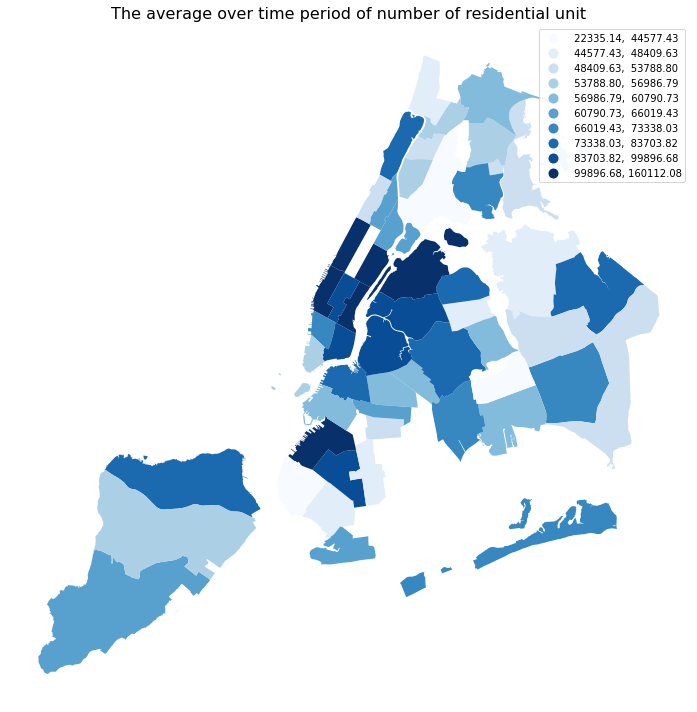

In [13]:
# Number of Residential Unit
fig, ax = plt.subplots(1, figsize=(15,10))
cd_merge.plot(column='unitstotal',categorical=False,cmap='Blues',legend=True, scheme='Quantiles', k=10, label="Dirty Level", ax=ax, )
ax.axis('off')
ax.set_title('The average over time period of number of residential unit',fontsize=16)
plt.tight_layout()
plt.savefig('cd_unitstotal.png',dpi=300)
plt.show()

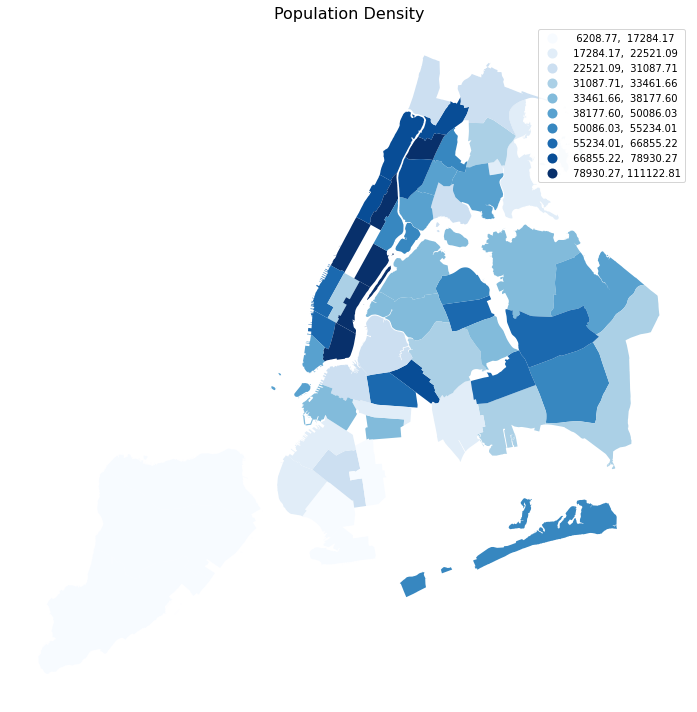

In [14]:
# Population Density
fig, ax = plt.subplots(1, figsize=(15,10))
cd_merge.plot(column='pop_density',categorical=False,cmap='Blues',legend=True, scheme='Quantiles', k=10, ax=ax, )
ax.axis('off')
ax.set_title('Population Density',fontsize=16)
plt.tight_layout()
plt.savefig('cd_pop_density.png',dpi=300)
plt.show()

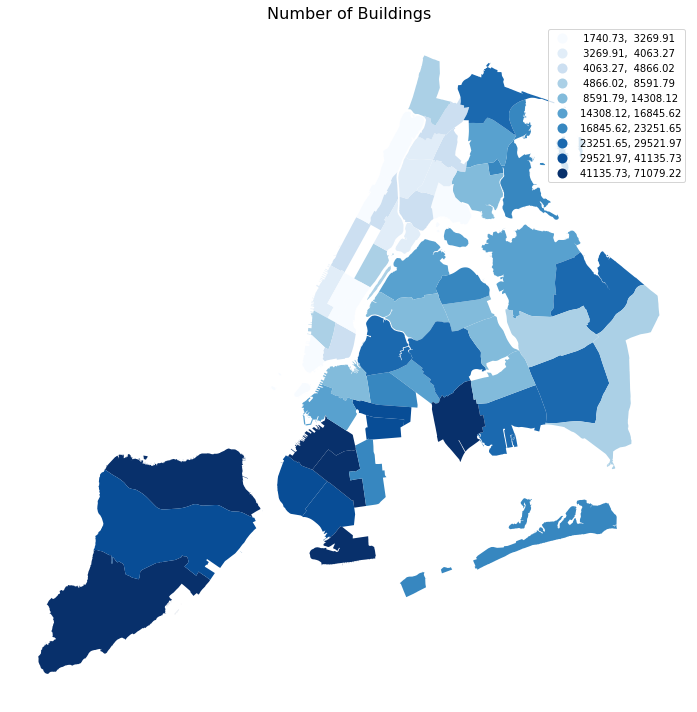

In [15]:
# Number of Buildings
fig, ax = plt.subplots(1, figsize=(15,10))
cd_merge.plot(column='numbldgs',categorical=False,cmap='Blues',legend=True, scheme='Quantiles', k=10, label="Dirty Level", ax=ax, )
ax.axis('off')
ax.set_title('Number of Buildings',fontsize=16)
plt.tight_layout()
plt.savefig('cd_num_buildings.png',dpi=300)
plt.show()

### Sanity Check

In [16]:
#check number of buildings, is it standardized by CD area?
cd_merge[['CD','numbldgs']].sort_values(by='numbldgs')

,CD,numbldgs
26,MN01,1740.728814
20,MN09,2622.186441
17,MN12,2906.491525
34,MN06,3088.423729
18,MN05,3156.203390
49,BX02,3254.966102
51,MN11,3292.322034
54,BX04,3356.372881
3,BX05,3485.559322
53,BX03,3670.762712


In [17]:
unnormalized_data = pd.read_csv('https://raw.githubusercontent.com/glpincus/NYCclean_ML4C/main/Data/final_data_3481.csv')

In [18]:
unnormalized_data[['CD','numbldgs']].sort_values(by='numbldgs')

,CD,numbldgs
1826,MN01,1692
1825,MN01,1692
1824,MN01,1692
1828,MN01,1698
1827,MN01,1698
...,...,...
3220,QN13,71717
3221,QN13,71717
3222,QN13,71717
3223,QN13,71717


In [25]:
#Check if staten island dirty_level is close to 3
# data[['CD','dirty_level']].groupby(by='CD').agg({'dirty_level':pd.Series.mode})
data[['CD','dirty_level']].groupby(by='CD').agg({'dirty_level':'mean'})

,dirty_level
CD,
BK01,2.525424
BK02,2.288136
BK03,2.796610
BK04,2.508475
BK05,2.372881
BK06,2.559322
BK07,1.949153
BK08,2.355932
BK09,1.762712
